In [1]:
# suitable habitat for sable fish, as a case study
# first on 'current' habitat using historical data - glorys data
# later on 'projections' - dowsncaled data

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
# Generals
ldp = '~/Documents/LargeData/' # data folder
months=['January','February','March','April','May','June','July','August','September','October','November','December']

# reginoal domain
ldom = np.array([[42.9, 48.4],[-126, -123]]) 
# QIN domain
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]]) 


In [4]:
#get bathymetry from ETOPO1
fn = ldp+'/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

In [16]:
# QIN mask
qin = xr.open_dataset(ldp+'QIN/qin_mask2.nc')
qin.close()
qin.coords['lon'] = np.mod(qin.coords['lon'] + 180,360) - 180
qin = qin.polygon_mask.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))
qin = qin.where(qin!=0,np.nan)

# number of pixels in the mask
npx = qin.count(dim=['lat','lon']).values
#print(npx)

#qin.plot()

# Sablefish
### Depth: 175-1,450m
### Distance from shore: 0-241km
### Timing: Dec-March for spawning
## Temperature; 4.72-12.85C (2.28-20.56C) for adults
#### 3.10-8.3 for spawning (?)
## Oxygen (O2): 35.13-298.72 mmol/m3

In [6]:
# sablefish characteristics
t1, t2 = 4.72, 12.85
o1, o2 = 35.123, 298.72
o1 = o1 / 44.661  # conversion to ml/l
o2 = o2 / 44.661  
d1, d2 = 175, 1450

In [7]:
# Climatology - Glorys data - T
ds_Ts = xr.open_dataset(ldp+'QIN/Glorys_Model/GLORYS_timeseries_surface_thetao_depth_5_216x300.nc')
ds_Ts.close()
ds_Ts.coords['lon'] = np.mod(ds_Ts.coords['lon'] + 180,360) - 180
ds_Ts = ds_Ts.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))

# Climatology
clim_Ts = ds_Ts.thetao.groupby('time.month').mean('time',keep_attrs=True)
clim_Ts

<xarray.DataArray 'thetao' (month: 12, lat: 66, lon: 37)>
array([[[10.533723 , 10.541983 , 10.553356 , ...,        nan,
                nan,        nan],
        [10.500539 , 10.511895 , 10.521073 , ...,        nan,
                nan,        nan],
        [10.453996 , 10.469131 , 10.481487 , ...,        nan,
                nan,        nan],
        ...,
        [ 9.1227455,  9.158377 ,  9.1812   , ...,  7.862565 ,
          7.803428 ,  7.6897607],
        [ 9.143119 ,  9.176728 ,  9.193461 , ...,  7.583471 ,
          7.506076 ,  7.4073277],
        [ 9.16061  ,  9.1832485,  9.180959 , ...,  7.3957114,
          7.32832  ,  7.295515 ]],

       [[10.410147 , 10.439614 , 10.462122 , ...,        nan,
                nan,        nan],
        [10.356736 , 10.393607 , 10.429445 , ...,        nan,
                nan,        nan],
        [10.3198595, 10.360231 , 10.406005 , ...,        nan,
                nan,        nan],
        ...,
        [ 8.897718 ,  8.907757 ,  8.911479 , ...,  7.7842307,
          7.736532 ,  7.6582775],
        [ 8.887392 ,  8.898199 ,  8.904948 , ...,  7.5857477,
          7.5428314,  7.4893045],
        [ 8.8711   ,  8.886123 ,  8.895209 , ...,  7.4609485,
          7.4386683,  7.4345064]],

       [[10.419857 , 10.435887 , 10.453801 , ...,        nan,
                nan,        nan],
        [10.401123 , 10.415493 , 10.432534 , ...,        nan,
                nan,        nan],
        [10.383993 , 10.398642 , 10.415653 , ...,        nan,
                nan,        nan],
        ...,
        [ 8.858707 ,  8.87255  ,  8.8807955, ...,  8.133993 ,
          8.085122 ,  8.034082 ],
        [ 8.845318 ,  8.855102 ,  8.860582 , ...,  8.010549 ,
          7.9863076,  7.9548426],
        [ 8.826652 ,  8.833874 ,  8.837206 , ...,  7.8936586,
          7.883402 ,  7.8852844]],

       ...,

       [[14.8971195, 14.80593  , 14.703217 , ...,        nan,
                nan,        nan],
        [14.935756 , 14.837745 , 14.720999 , ...,        nan,
                nan,        nan],
        [14.942847 , 14.856924 , 14.73613  , ...,        nan,
                nan,        nan],
        ...,
        [13.052105 , 12.973714 , 12.892408 , ..., 11.522936 ,
         11.509764 , 11.513092 ],
        [12.906875 , 12.817392 , 12.724553 , ..., 11.526745 ,
         11.538182 , 11.540194 ],
        [12.715792 , 12.601719 , 12.480271 , ..., 11.5426235,
         11.520582 , 11.542201 ]],

       [[13.156643 , 13.122674 , 13.087043 , ...,        nan,
                nan,        nan],
        [13.105316 , 13.079553 , 13.056279 , ...,        nan,
                nan,        nan],
        [13.080604 , 13.057377 , 13.034252 , ...,        nan,
                nan,        nan],
        ...,
        [11.204097 , 11.176826 , 11.13831  , ...,  9.856852 ,
          9.828997 ,  9.777542 ],
        [11.090738 , 11.044673 , 10.980692 , ...,  9.727174 ,
          9.703571 ,  9.654583 ],
        [10.936939 , 10.858695 , 10.766525 , ...,  9.592809 ,
          9.543081 ,  9.536358 ]],

       [[11.410743 , 11.39556  , 11.379641 , ...,        nan,
                nan,        nan],
        [11.399443 , 11.375952 , 11.353901 , ...,        nan,
                nan,        nan],
        [11.3900385, 11.358832 , 11.331329 , ...,        nan,
                nan,        nan],
        ...,
        [ 9.911062 ,  9.9297085,  9.921485 , ...,  8.526368 ,
          8.4936285,  8.416042 ],
        [ 9.902773 ,  9.902434 ,  9.874024 , ...,  8.359407 ,
          8.306459 ,  8.233875 ],
        [ 9.879589 ,  9.853831 ,  9.802393 , ...,  8.199834 ,
          8.144512 ,  8.113386 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 42.916668 43.0 43.083332 ... 48.25 48.333332
  * lon      (lon) float32 -126.0 -125.91666 -125.83334 ... -123.08334 -123.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

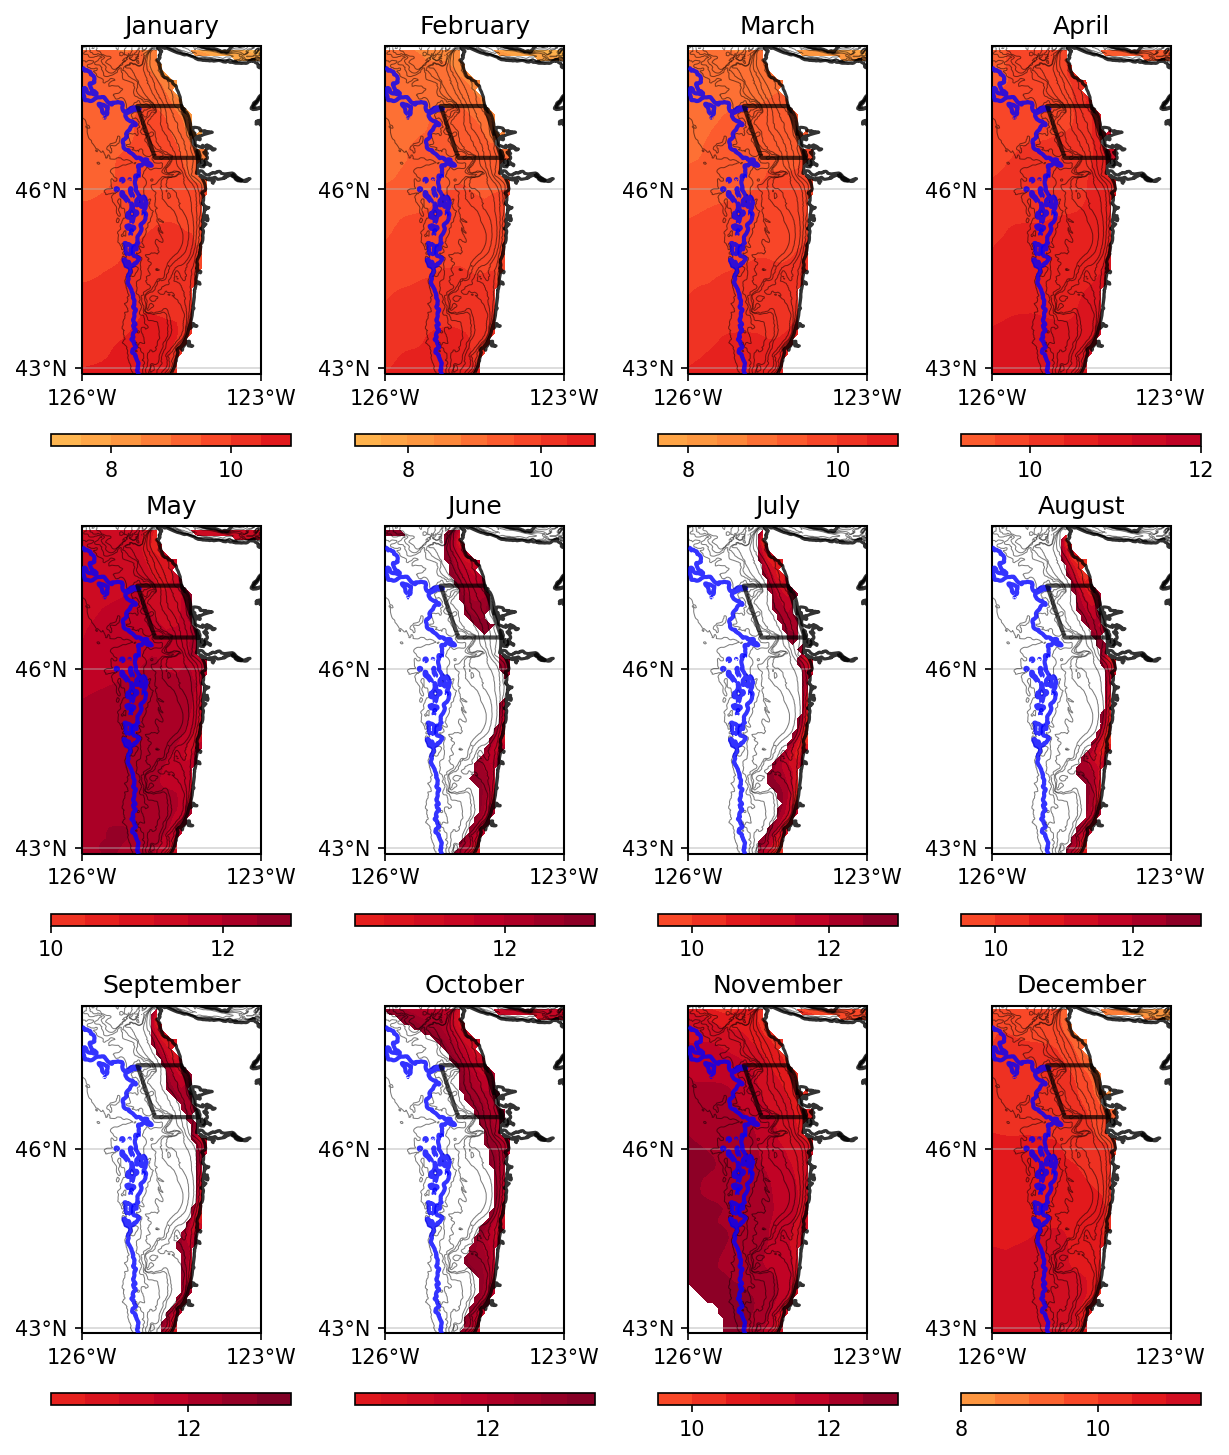

In [8]:
fig=plt.figure(figsize=(10,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(-126,-122,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(43,49,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    plt.contour(X,Y,topo2,[ -d2],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    tmp = clim_Ts[i,:,:]
    tmp = tmp.where((tmp>=t1)&(tmp<=t2))
    plt.contourf(clim_Ts.lon, clim_Ts.lat, tmp, cmap='YlOrRd' ,vmin=np.floor(t1), vmax=np.ceil(t2))
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(int(np.floor(t1)),int(np.ceil(t2))+1,2)])
    plt.title(months[i])
    
plt.tight_layout(h_pad=1)

#fig.savefig('./map_base_xsmall.png')
plt.show()

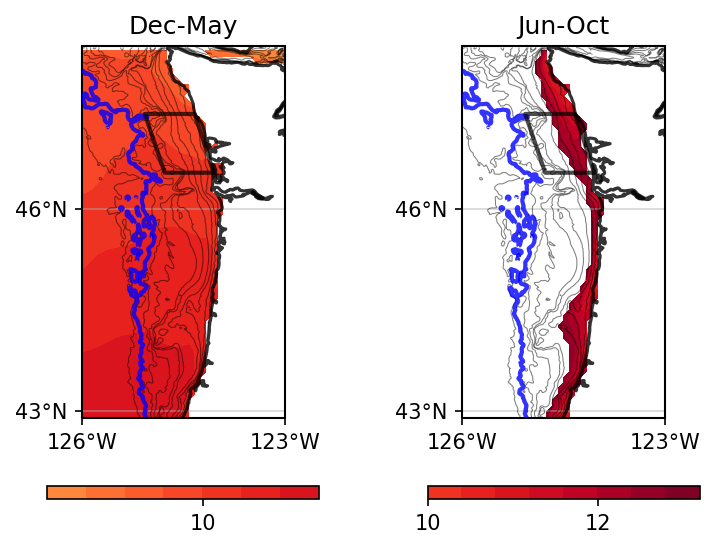

In [9]:
clim_Ts1 = clim_Ts.where((clim_Ts.month>11)|(clim_Ts.month<6), drop=True)
clim_Ts1 = clim_Ts1.mean(dim='month')
clim_Ts1 = clim_Ts1.where((clim_Ts1>=t1)&(clim_Ts1<=t2))
clim_Ts2 = clim_Ts.where((clim_Ts.month<11)*(clim_Ts.month>5), drop=True)
clim_Ts2 = clim_Ts2.mean(dim='month')
clim_Ts2 = clim_Ts2.where((clim_Ts2>=t1)&(clim_Ts2<=t2))

fig=plt.figure(figsize=(6,4),dpi=150)
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(-126,-122,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(43,49,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    plt.contour(X,Y,topo2,[ -d2],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    if i==0:
        tmp = clim_Ts1
        ti = 'Dec-May'
    else:
        tmp = clim_Ts2
        ti = 'Jun-Oct'
    
    plt.contourf(clim_Ts.lon, clim_Ts.lat, tmp, cmap='YlOrRd' ,vmin=np.floor(t1), vmax=np.ceil(t2))
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(int(np.floor(t1)),int(np.ceil(t2))+1,2)])
    plt.title(ti)
    
plt.tight_layout(h_pad=0.4)

#fig.savefig('./map_base_xsmall.png')
plt.show()

In [10]:
# percentage of suitable habitat - T
# apply mask
clim_Ts1 = clim_Ts1*qin
clim_Ts2 = clim_Ts2*qin
Ts_w_sh = np.round(clim_Ts1.count(dim=['lat','lon']).values*100/npx,1)
Ts_s_sh = np.round(clim_Ts2.count(dim=['lat','lon']).values*100/npx,1)
print(Ts_w_sh, Ts_s_sh)

100.0 51.7


In [11]:
# Climatology - Glorys data - T
ds_Tb = xr.open_dataset(ldp+'QIN/Glorys_Model/GLORYS_timeseries_bottom_thetao_216x300.nc')
ds_Tb.close()
ds_Tb.coords['lon'] = np.mod(ds_Tb.coords['lon'] + 180,360) - 180
ds_Tb = ds_Tb.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))

# Climatology
clim_Tb = ds_Tb.thetao.groupby('time.month').mean('time',keep_attrs=True)
clim_Tb

<xarray.DataArray 'thetao' (month: 12, lat: 66, lon: 37)>
array([[[ 1.52543486,  1.49224964,  1.49202427, ...,         nan,
                 nan,         nan],
        [ 1.49154538,  1.49157355,  1.49224964, ...,         nan,
                 nan,         nan],
        [ 1.49154538,  1.49216513,  1.49241866, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.77612334,  3.7957581 ,  4.18857398, ...,  8.50486777,
          8.68665471,  8.90635989],
        [ 4.13096435,  5.62940436,  6.79153971, ...,  8.40395942,
          8.49512056,  8.54706779],
        [ 4.5668251 ,  6.28494189,  8.10176981, ...,  8.66375171,
          8.6535821 ,  8.52430567]],

       [[ 1.5261108 ,  1.49267219,  1.49196793, ...,         nan,
                 nan,         nan],
        [ 1.49191159,  1.49157355,  1.49191159, ...,         nan,
                 nan,         nan],
        [ 1.49168623,  1.49185525,  1.49185525, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.73617678,  3.74916377,  4.12059725, ...,  8.36342148,
          8.40362138,  8.53470072],
        [ 4.07262245,  5.45674467,  6.52980379, ...,  8.33254616,
          8.38105646,  8.38190156],
        [ 4.4753258 ,  6.07582918,  8.00573518, ...,  8.42365092,
          8.42880616,  8.39542367]],

       [[ 1.52667449,  1.49191159,  1.49154538, ...,         nan,
                 nan,         nan],
        [ 1.49101015,  1.49101015,  1.49185525, ...,         nan,
                 nan,         nan],
        [ 1.49084113,  1.49151721,  1.49193969, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.67910253,  3.69724464,  4.06186104, ...,  8.30257225,
          8.39531095,  8.45787855],
        [ 4.00746309,  5.35490685,  6.39396352, ...,  8.26042854,
          8.27465487,  8.3024877 ],
        [ 4.41591344,  5.95345464,  7.83273745, ...,  8.33243341,
          8.34226506,  8.28730363]],

       ...,

       [[ 1.52619545,  1.49433437,  1.49408076, ...,         nan,
                 nan,         nan],
        [ 1.49284128,  1.49323566,  1.49410893, ...,         nan,
                 nan,         nan],
        [ 1.492475  ,  1.49351736,  1.49416527, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.75493864,  3.77972911,  4.1582902 , ...,  7.52792795,
          9.9202035 ,  8.73927791],
        [ 4.11755488,  5.77955536,  6.80323084, ...,  7.4350766 ,
          7.51736384,  7.62469508],
        [ 4.5358934 ,  6.49946363,  7.20725815, ...,  7.79935481,
          7.78794571,  7.57455078]],

       [[ 1.52791383,  1.49717947,  1.49641888, ...,         nan,
                 nan,         nan],
        [ 1.49582738,  1.49560195,  1.49608084, ...,         nan,
                 nan,         nan],
        [ 1.49489762,  1.49557378,  1.49579914, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.77336245,  3.79846294,  4.16660052, ...,  7.8944317 ,
         10.00015255,  9.2840757 ],
        [ 4.11583658,  5.69718368,  6.82568297, ...,  7.8162574 ,
          7.92454654,  7.98998756],
        [ 4.52679388,  6.43421962,  7.4151034 , ...,  8.20160759,
          8.11303814,  7.97212725]],

       [[ 1.52692765,  1.49560195,  1.49565836, ...,         nan,
                 nan,         nan],
        [ 1.4944188 ,  1.49450331,  1.49557378, ...,         nan,
                 nan,         nan],
        [ 1.49399625,  1.49467234,  1.49532025, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.77646116,  3.79784313,  4.16454418, ...,  8.25837205,
          9.11654326,  9.03287554],
        [ 4.11699156,  5.57511887,  6.79232854, ...,  8.15349164,
          8.28251457,  8.33913807],
        [ 4.50963794,  6.29652016,  7.80529899, ...,  8.48641572,
          8.44382132,  8.32705274]]])
Coordinates:
  * lat      (lat) float32 42.916668 43.0 43.083332 ... 48.25 48.333332
  * lon      (lon) float32 -126.0 -125.91666 -125.83334 ... -123.08334 -123.0
  * 

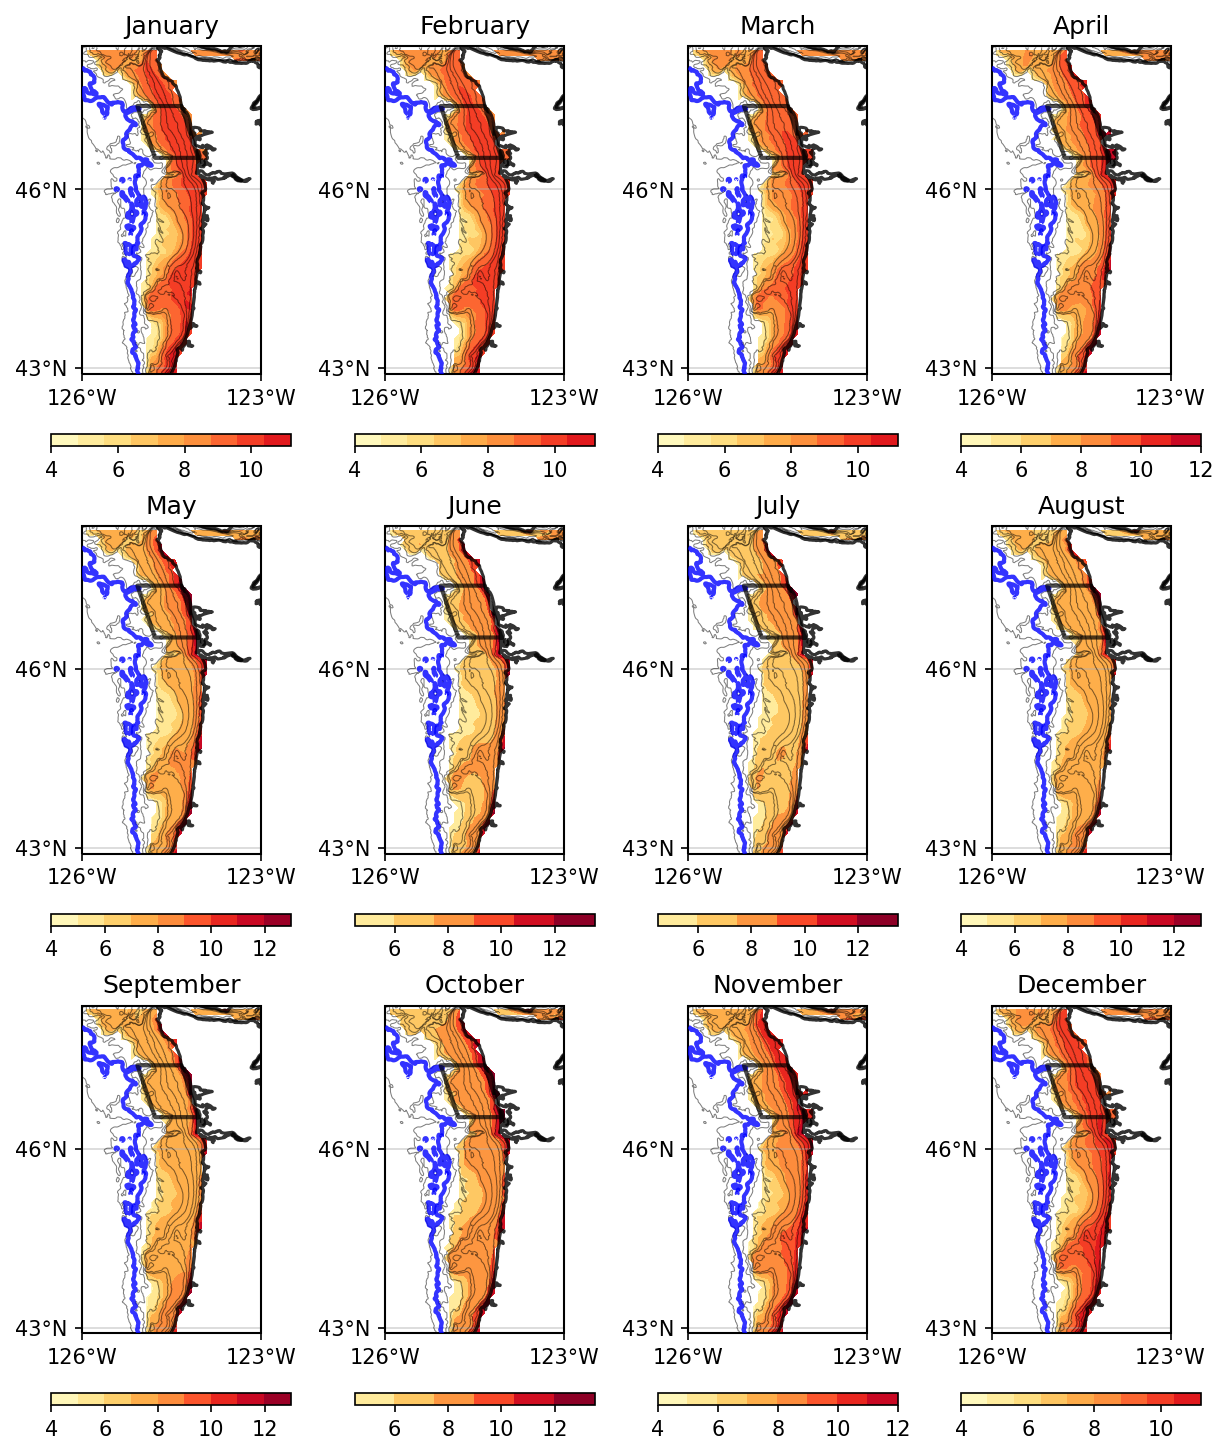

In [12]:
fig=plt.figure(figsize=(10,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(-126,-122,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(43,49,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    plt.contour(X,Y,topo2,[ -d2],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    tmp = clim_Tb[i,:,:]
    tmp = tmp.where((tmp>=t1)&(tmp<=t2))
    plt.contourf(clim_Tb.lon, clim_Tb.lat, tmp, cmap='YlOrRd' ,vmin=np.floor(t1), vmax=np.ceil(t2))
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(int(np.floor(t1)),int(np.ceil(t2))+1,2)])
    plt.title(months[i])
    
plt.tight_layout(h_pad=1)

#fig.savefig('./map_base_xsmall.png')
plt.show()

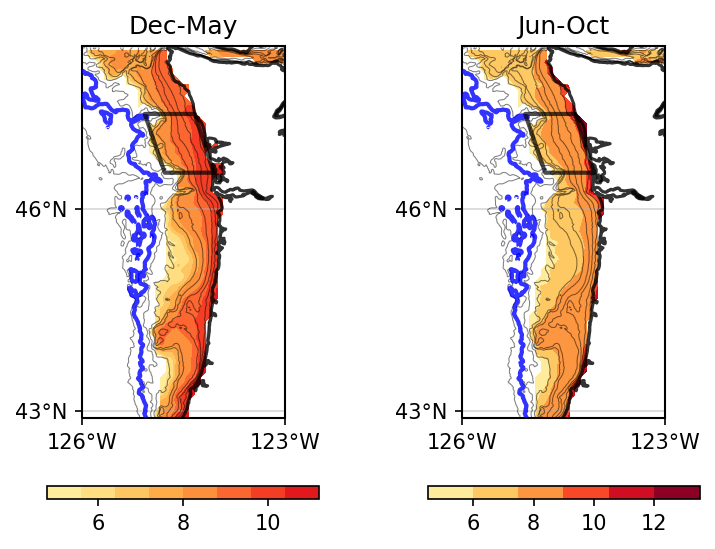

In [13]:
clim_Tb1 = clim_Tb.where((clim_Tb.month>11)|(clim_Tb.month<6), drop=True)
clim_Tb1 = clim_Tb1.mean(dim='month')
clim_Tb1 = clim_Tb1.where((clim_Tb1>=t1)&(clim_Tb1<=t2))
clim_Tb2 = clim_Tb.where((clim_Tb.month<11)*(clim_Tb.month>5), drop=True)
clim_Tb2 = clim_Tb2.mean(dim='month')
clim_Tb2 = clim_Tb2.where((clim_Tb2>=t1)&(clim_Tb2<=t2))

fig=plt.figure(figsize=(6,4),dpi=150)
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(-126,-122,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(43,49,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    plt.contour(X,Y,topo2,[ -d2],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    if i==0:
        tmp = clim_Tb1
        ti = 'Dec-May'
    else:
        tmp = clim_Tb2
        ti = 'Jun-Oct'
        
    plt.contourf(clim_Ts.lon, clim_Ts.lat, tmp, cmap='YlOrRd' ,vmin=np.floor(t1), vmax=np.ceil(t2))
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(int(np.floor(t1)),int(np.ceil(t2))+1,2)])
    plt.title(ti)
    
plt.tight_layout(h_pad=0.4)

#fig.savefig('./map_base_xsmall.png')
plt.show()

In [15]:
# percentage of suitable habitat - T
# apply mask
clim_Tb1 = clim_Tb1*qin
clim_Tb2 = clim_Tb2*qin
Tb_w_sh = np.round(clim_Tb1.count(dim=['lat','lon']).values*100/npx,1)
Tb_s_sh = np.round(clim_Tb2.count(dim=['lat','lon']).values*100/npx,1)
print(Tb_w_sh, Tb_s_sh)

96.6 96.6


In [20]:
# Climatology - Glorys data - T
ds_Ts = xr.open_dataset(ldp+'QIN/Glorys_Model/GLORYS_timeseries_extrapolated_bottom_o2_216x300.nc')
ds_Ts.close()
ds_Ts.coords['lon'] = np.mod(ds_Ts.coords['lon'] + 180,360) - 180
ds_Ts = ds_Ts.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))

# Climatology
clim_Ts = ds_Ts.o2.groupby('time.month').mean('time',keep_attrs=True)
clim_Ts

<xarray.DataArray 'o2' (month: 12, lat: 66, lon: 37)>
array([[[1.99564081, 2.00349738, 2.01136669, ...,        nan,
                nan,        nan],
        [2.01721277, 2.02145721, 2.02571572, ...,        nan,
                nan,        nan],
        [2.0408664 , 2.03989815, 2.03894742, ...,        nan,
                nan,        nan],
        ...,
        [0.33057638, 0.55029867, 0.76991148, ..., 1.21225077,
         1.40497163, 1.38591515],
        [0.29104167, 0.6468296 , 1.00245794, ..., 0.87748924,
         1.07093453, 0.85753183],
        [0.70060274, 0.97756458, 1.25472016, ..., 0.62033438,
         0.71062646, 0.80091091]],

       [[2.01092891, 2.02246261, 2.03400961, ...,        nan,
                nan,        nan],
        [2.03512414, 2.04220545, 2.0493017 , ...,        nan,
                nan,        nan],
        [2.06067523, 2.06038666, 2.06011673, ...,        nan,
                nan,        nan],
        ...,
        [0.32977086, 0.54881537, 0.76775123, ..., 1.2435479 ,
         1.44374328, 1.43215104],
        [0.29103466, 0.64608074, 1.00096808, ..., 0.93444474,
         1.15960361, 0.99953342],
        [0.69747782, 1.00143836, 1.30558044, ..., 0.666867  ,
         0.79312802, 0.91937766]],

       [[2.02426747, 2.03746607, 2.05068014, ...,        nan,
                nan,        nan],
        [2.05230066, 2.05989615, 2.06750918, ...,        nan,
                nan,        nan],
        [2.07798145, 2.07811235, 2.07826182, ...,        nan,
                nan,        nan],
        ...,
        [0.33580709, 0.5540299 , 0.77214488, ..., 1.17589203,
         1.35669607, 1.3265388 ],
        [0.2977871 , 0.65153566, 1.00512647, ..., 0.91631792,
         1.13374134, 1.01844123],
        [0.70757322, 1.02076296, 1.33413326, ..., 0.66238853,
         0.79745585, 0.93251085]],

       ...,

       [[1.97671974, 1.98509852, 1.99349476, ...,        nan,
                nan,        nan],
        [2.00506477, 2.00938693, 2.01372805, ...,        nan,
                nan,        nan],
        [2.03224048, 2.03202718, 2.03183368, ...,        nan,
                nan,        nan],
        ...,
        [0.30043029, 0.48212641, 0.66371478, ..., 0.63198734,
         0.66081216, 0.57155615],
        [0.24390777, 0.55071588, 0.85737017, ..., 0.58687893,
         0.70652395, 0.74140657],
        [0.62342493, 0.89445593, 1.16566116, ..., 0.68534831,
         0.72118827, 0.75705273]],

       [[1.97022804, 1.9780809 , 1.98594803, ...,        nan,
                nan,        nan],
        [1.99389947, 1.99901931, 2.00415444, ...,        nan,
                nan,        nan],
        [2.01939285, 2.02034814, 2.02132156, ...,        nan,
                nan,        nan],
        ...,
        [0.31092502, 0.49771095, 0.68438791, ..., 0.72039078,
         0.78180979, 0.66560645],
        [0.2553119 , 0.56785287, 0.88023857, ..., 0.57750556,
         0.66540512, 0.57825424],
        [0.63036426, 0.88167391, 1.13316183, ..., 0.54268547,
         0.56199098, 0.5813058 ]],

       [[1.97830099, 1.98427795, 1.99026831, ...,        nan,
                nan,        nan],
        [1.99980691, 2.00286622, 2.00594   , ...,        nan,
                nan,        nan],
        [2.02312656, 2.02246558, 2.02182176, ...,        nan,
                nan,        nan],
        ...,
        [0.31890926, 0.52494246, 0.73086389, ..., 0.98997403,
         1.1162641 , 1.02300995],
        [0.26923441, 0.60732433, 0.94525384, ..., 0.72457576,
         0.82105063, 0.6018009 ],
        [0.65663853, 0.90590553, 1.15536047, ..., 0.52839891,
         0.55667357, 0.58494647]]])
Coordinates:
  * lat      (lat) float32 42.916668 43.0 43.083332 ... 48.25 48.333332
  * lon      (lon) float32 -126.0 -125.91666 -125.83334 ... -123.08334 -123.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Dissolved Oxygen
    standard_name:  oxygen
    units:          ml/l

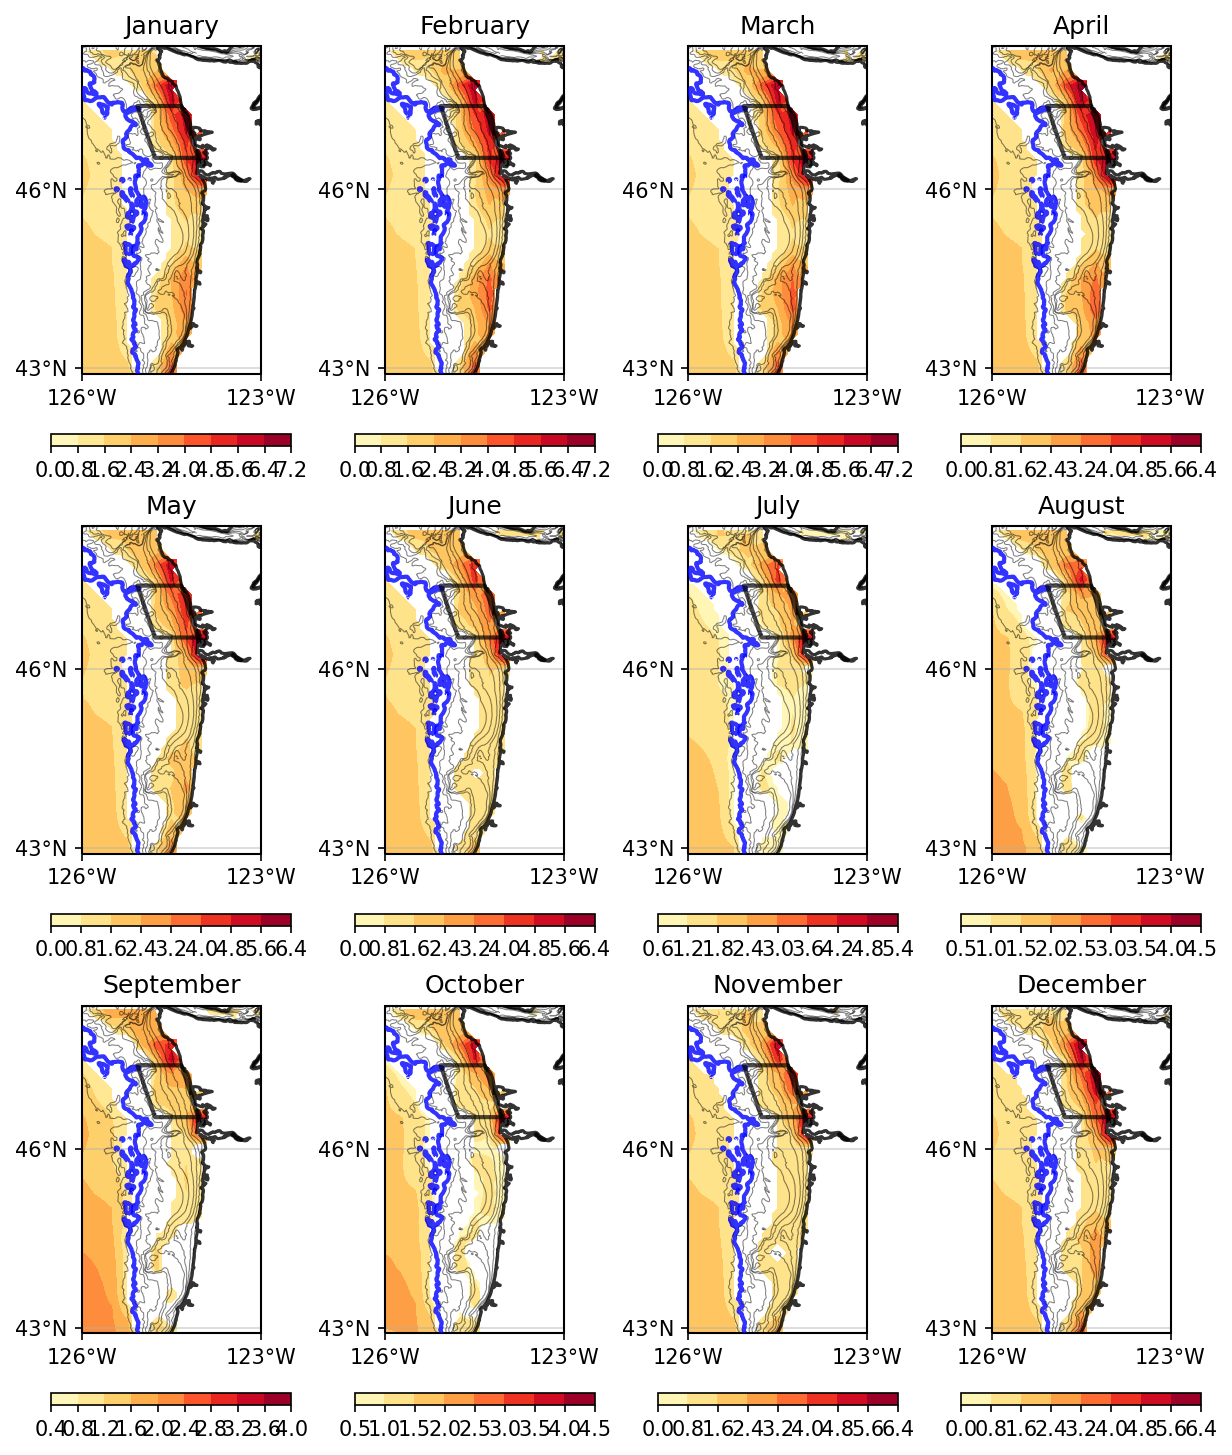

In [24]:
fig=plt.figure(figsize=(10,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(-126,-122,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(43,49,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    plt.contour(X,Y,topo2,[ -d2],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    tmp = clim_Ts[i,:,:]
    tmp = tmp.where((tmp>=o1)&(tmp<=o2))
    plt.contourf(clim_Ts.lon, clim_Ts.lat, tmp, cmap='YlOrRd')
    plt.colorbar(fraction=0.03, orientation='horizontal') #, ticks=[*range(int(np.floor(t1)),int(np.ceil(t2))+1,2)])
    plt.title(months[i])
    
plt.tight_layout(h_pad=1)

#fig.savefig('./map_base_xsmall.png')
plt.show()

In [25]:
# Climatology - Glorys data - T
ds_Ts = xr.open_dataset(ldp+'QIN/Glorys_Model/GLORYS_timeseries_extrapolated_surface_o2_depth_5_216x300.nc')
ds_Ts.close()
ds_Ts.coords['lon'] = np.mod(ds_Ts.coords['lon'] + 180,360) - 180
ds_Ts = ds_Ts.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))

# Climatology
clim_Ts = ds_Ts.o2.groupby('time.month').mean('time',keep_attrs=True)
clim_Ts

<xarray.DataArray 'o2' (month: 12, lat: 66, lon: 37)>
array([[[6.206494 , 6.204674 , 6.202858 , ...,       nan,       nan,
               nan],
        [6.2096434, 6.208012 , 6.2063828, ...,       nan,       nan,
               nan],
        [6.2157016, 6.214137 , 6.212576 , ...,       nan,       nan,
               nan],
        ...,
        [6.48275  , 6.485858 , 6.4889708, ..., 7.061102 , 7.070093 ,
         7.0339613],
        [6.4901013, 6.493373 , 6.4966474, ..., 7.0695796, 7.0917673,
         7.100091 ],
        [6.5001144, 6.5059533, 6.511798 , ..., 7.0925097, 7.107414 ,
         7.1223354]],

       [[6.286341 , 6.2852764, 6.2842135, ...,       nan,       nan,
               nan],
        [6.28836  , 6.287625 , 6.2868915, ...,       nan,       nan,
               nan],
        [6.2888136, 6.2884245, 6.288037 , ...,       nan,       nan,
               nan],
        ...,
        [6.5741262, 6.583664 , 6.593208 , ..., 7.364868 , 7.3775353,
         7.366992 ],
        [6.5890803, 6.6000943, 6.611117 , ..., 7.360918 , 7.3801494,
         7.3845396],
        [6.6145606, 6.627171 , 6.6397934, ..., 7.3623734, 7.3726172,
         7.382865 ]],

       [[6.3238964, 6.3267584, 6.3296256, ...,       nan,       nan,
               nan],
        [6.329023 , 6.331945 , 6.3348675, ...,       nan,       nan,
               nan],
        [6.332706 , 6.335066 , 6.33743  , ...,       nan,       nan,
               nan],
        ...,
        [6.658099 , 6.671822 , 6.6855536, ..., 7.366717 , 7.382674 ,
         7.3907614],
        [6.6770077, 6.6920743, 6.7071476, ..., 7.344642 , 7.3581324,
         7.349839 ],
        [6.7104015, 6.726773 , 6.7431617, ..., 7.3230815, 7.328791 ,
         7.3344946]],

       ...,

       [[5.960104 , 5.969376 , 5.978653 , ...,       nan,       nan,
               nan],
        [5.971388 , 5.9805655, 5.9897494, ...,       nan,       nan,
               nan],
        [5.9774   , 5.9863   , 5.9952016, ...,       nan,       nan,
               nan],
        ...,
        [6.0509686, 6.050763 , 6.0505676, ..., 6.1389723, 6.1526356,
         6.1332545],
        [6.064715 , 6.063738 , 6.062769 , ..., 6.127391 , 6.1506467,
         6.1531405],
        [6.082688 , 6.0802717, 6.077868 , ..., 6.1182203, 6.1326523,
         6.1470866]],

       [[6.0002337, 6.005631 , 6.011028 , ...,       nan,       nan,
               nan],
        [6.002906 , 6.008378 , 6.0138507, ...,       nan,       nan,
               nan],
        [6.0082493, 6.01342  , 6.0185933, ...,       nan,       nan,
               nan],
        ...,
        [6.1972456, 6.1981173, 6.1989956, ..., 6.4138   , 6.426656 ,
         6.394345 ],
        [6.2049484, 6.205888 , 6.206833 , ..., 6.417615 , 6.4510493,
         6.468363 ],
        [6.2156453, 6.2171054, 6.2185726, ..., 6.4260426, 6.4499288,
         6.473829 ]],

       [[6.09631  , 6.094801 , 6.093293 , ...,       nan,       nan,
               nan],
        [6.1007767, 6.0996175, 6.09846  , ...,       nan,       nan,
               nan],
        [6.1092753, 6.108322 , 6.1073737, ...,       nan,       nan,
               nan],
        ...,
        [6.3424635, 6.3455067, 6.348553 , ..., 6.7324963, 6.7358255,
         6.696079 ],
        [6.3498363, 6.352448 , 6.3550644, ..., 6.747445 , 6.761957 ,
         6.7710366],
        [6.359461 , 6.363327 , 6.3671975, ..., 6.769391 , 6.781614 ,
         6.7938557]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 42.916668 43.0 43.083332 ... 48.25 48.333332
  * lon      (lon) float32 -126.0 -125.91666 -125.83334 ... -123.08334 -123.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Dissolved Oxygen
    standard_name:  oxygen
    units:          ml/l

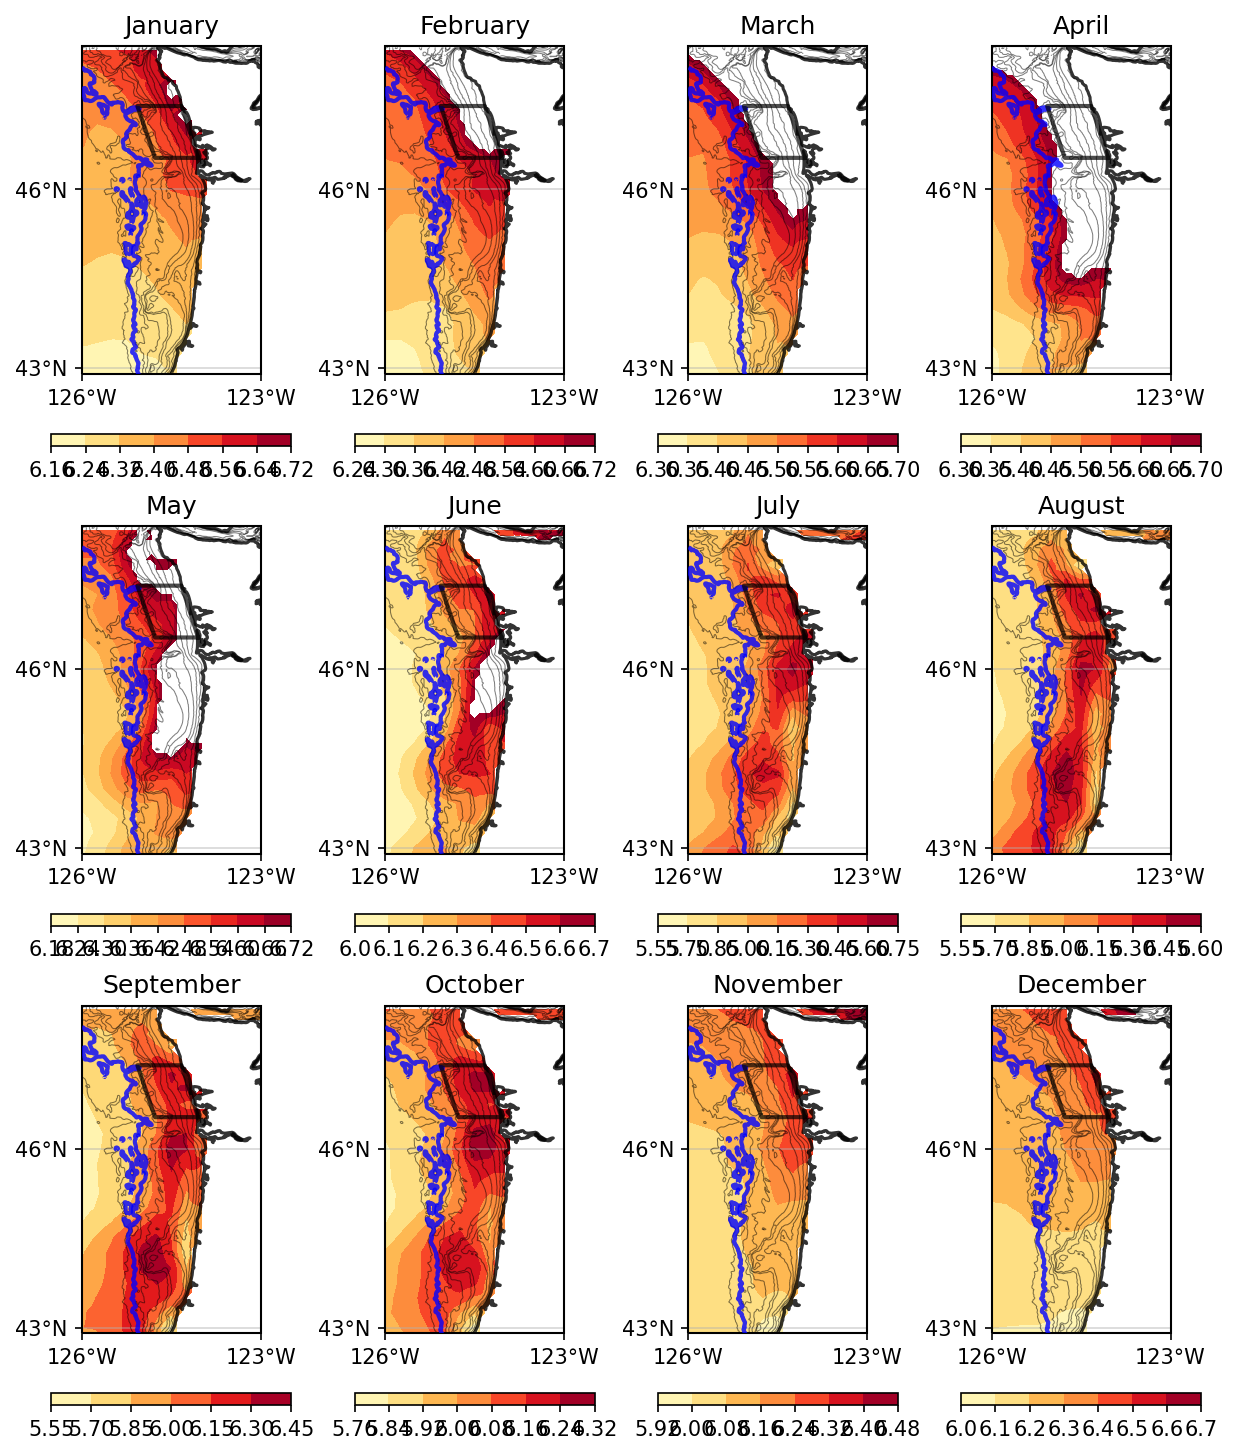

In [26]:
fig=plt.figure(figsize=(10,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(-126,-122,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(43,49,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    plt.contour(X,Y,topo2,[ -d2],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    tmp = clim_Ts[i,:,:]
    tmp = tmp.where((tmp>=o1)&(tmp<=o2))
    plt.contourf(clim_Ts.lon, clim_Ts.lat, tmp, cmap='YlOrRd')
    plt.colorbar(fraction=0.03, orientation='horizontal') #, ticks=[*range(int(np.floor(t1)),int(np.ceil(t2))+1,2)])
    plt.title(months[i])
    
plt.tight_layout(h_pad=1)

#fig.savefig('./map_base_xsmall.png')
plt.show()